In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\theop\Documents\GitHub\AFCON-Mini-Project\data.csv")

In [5]:
print(df.head())

       Team_1         Team_2  Rnk_1  Rnk_2  Wins_1  Wins_2  Po_1  Po_2  St_1  \
0    Cameroon   Burkina Faso     50     60       4       2    60    40     4   
1    Ethiopia     Cape Verde    137     73       1       3    43    57     1   
2    Cameroon       Ethiopia     50    137       5       0    50    50     7   
3  Cape Verde   Burkina Faso     73     60       4       2    56    44     2   
4     Senegal       Zimbabwe     20    121       4       0    61    39     3   

   St_2  ...  F_2  Y_1  Y_2  R_1  R_2  Of_1  Of_2  Cor_1  Cor_2  Outcome  
0     6  ...   21    1    2    0    0     1     1      6      5        1  
1     3  ...    8    1    1    1    0     1     4      1      6        0  
2     5  ...    9    2    1    0    0     3     0      7      1        1  
3     4  ...   19    2    1    0    0     2     5      4      6        0  
4     2  ...   12    1    2    0    0     1     3      4      4        1  

[5 rows x 25 columns]


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Team_1   63 non-null     object
 1   Team_2   63 non-null     object
 2   Rnk_1    63 non-null     int64 
 3   Rnk_2    63 non-null     int64 
 4   Wins_1   63 non-null     int64 
 5   Wins_2   63 non-null     int64 
 6   Po_1     63 non-null     int64 
 7   Po_2     63 non-null     int64 
 8   St_1     63 non-null     int64 
 9   St_2     63 non-null     int64 
 10  Ps_1     63 non-null     int64 
 11  Ps_2     63 non-null     int64 
 12  PA_1     63 non-null     int64 
 13  PA_2     63 non-null     int64 
 14  F_1      63 non-null     int64 
 15  F_2      63 non-null     int64 
 16  Y_1      63 non-null     int64 
 17  Y_2      63 non-null     int64 
 18  R_1      63 non-null     int64 
 19  R_2      63 non-null     int64 
 20  Of_1     63 non-null     int64 
 21  Of_2     63 non-null     int64 
 22  Cor_

In [9]:
# Convert outcome data type into categorical 
df[['Outcome']] = df[['Outcome']].astype('category')

In [11]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(f'Missing Values:\n{missing_values}')

Missing Values:
Team_1     0
Team_2     0
Rnk_1      0
Rnk_2      0
Wins_1     0
Wins_2     0
Po_1       0
Po_2       0
St_1       0
St_2       0
Ps_1       0
Ps_2       0
PA_1       0
PA_2       0
F_1        0
F_2        0
Y_1        0
Y_2        0
R_1        0
R_2        0
Of_1       0
Of_2       0
Cor_1      0
Cor_2      0
Outcome    0
dtype: int64


In [13]:
#Check for Multicolinearity
numeric_df = df.select_dtypes(include='number') # Exclude the non-numeric columns 


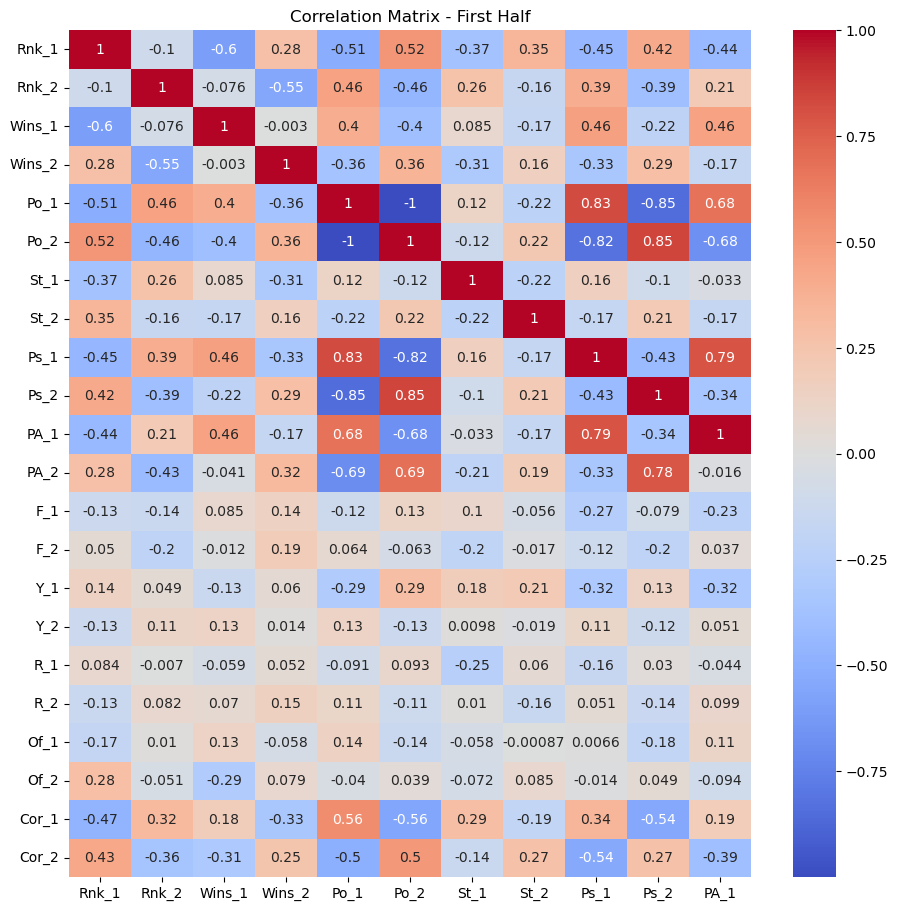

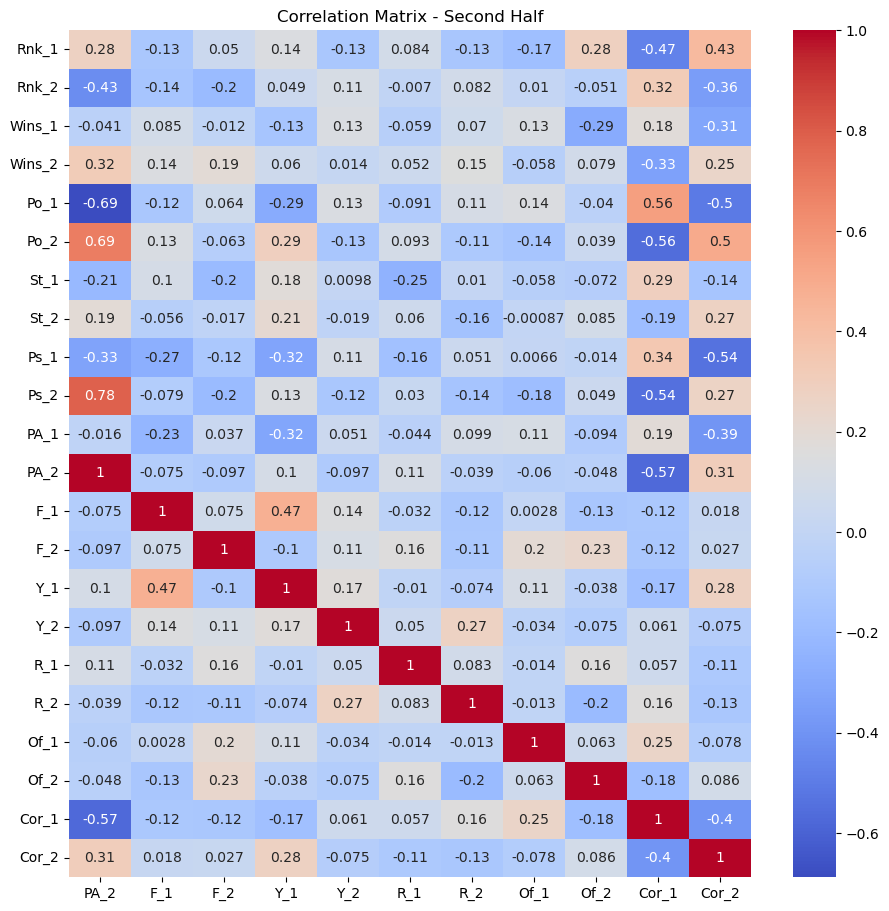

In [15]:
corr_matrix = numeric_df.corr()

# Split the correlation matrix into two halves column-wise
half_cols = len(corr_matrix.columns) // 2
first_half = corr_matrix.iloc[:, :half_cols]
second_half = corr_matrix.iloc[:, half_cols:]

# Plot the first half
plt.figure(figsize=(11, 11))
sns.heatmap(first_half, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - First Half')
plt.show()

# Plot the second half
plt.figure(figsize=(11, 11))
sns.heatmap(second_half, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Second Half')
plt.show()

In [17]:
# Drop columns to avoid Multicolinearity

columns_to_drop = ['Team_1', 'Team_2', 'Rnk_1', 'Rnk_2', 'Po_1', 'Po_2', 'Ps_1', 'Ps_2'] 
data = df.drop(columns=columns_to_drop)

In [19]:
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

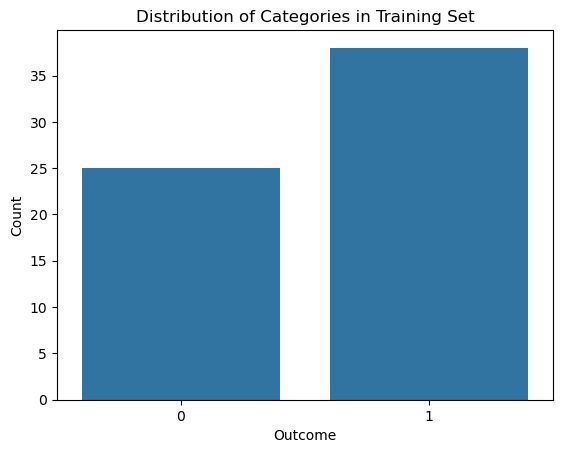

In [24]:
sns.countplot(x='Outcome', data=pd.DataFrame({'Outcome': y}))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Categories in Training Set')
plt.show()

In [26]:
dr=pd.DataFrame({'Outcome': y})
dr['Outcome'].value_counts()

Outcome
1    38
0    25
Name: count, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [30]:
dr=pd.DataFrame({'Outcome': y_resampled})
dr['Outcome'].value_counts()

Outcome
0    38
1    38
Name: count, dtype: int64

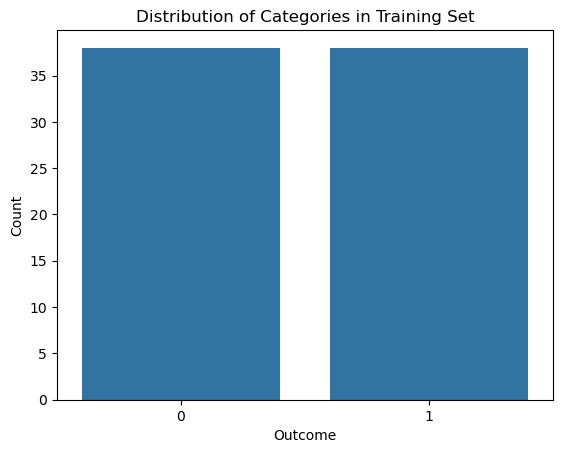

In [32]:
sns.countplot(x='Outcome', data=pd.DataFrame({'Outcome': y_resampled}))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Categories in Training Set')
plt.show()

In [34]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming you've already split the data into X_train_scaled, y_train_resampled

# Build a logistic regression model
model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y_resampled, cv=5)

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
mean_cv_accuracy = cv_scores.mean()
print(f'Mean CV accuracy: {mean_cv_accuracy}')

# Update the model using the entire training dataset
model.fit(X_scaled, y_resampled)

# Now, 'model' contains the logistic regression model trained on the average cross-validation performance


Cross-validation scores: [0.6875     0.86666667 0.66666667 0.93333333 1.        ]
Mean CV accuracy: 0.8308333333333333


LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10.0]  # Regularization strength
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y_resampled)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters found:")
print(best_params)
print("Best cross-validation accuracy: {:.2f}".format(best_score))

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test_scaled, y)
print("Test set accuracy: {:.2f}".format(test_accuracy))

Best hyperparameters found:
{'C': 0.1, 'penalty': 'l1'}
Best cross-validation accuracy: 0.86
Test set accuracy: 0.84


In [41]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)


In [43]:
# Evaluate the model
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8412698412698413
Confusion Matrix:
[[20  5]
 [ 5 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.87      0.87      0.87        38

    accuracy                           0.84        63
   macro avg       0.83      0.83      0.83        63
weighted avg       0.84      0.84      0.84        63



In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.868421052631579
Recall: 0.868421052631579
F1-Score: 0.868421052631579


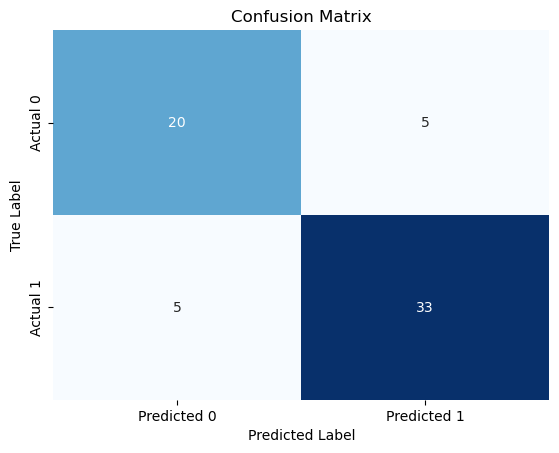

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the ground truth labels 'y_test' and the predicted labels 'y_pred'
# If you're working with binary classification, make sure 'y_test' and 'y_pred' are 1D arrays

# Generate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Assuming you have a new dataset for future prediction called 'new_data'

# Load and preprocess the new data
new_data = pd.read_csv('/home/student17/Desktop/Aims Theo/REVIEW PHASE/MINI PROJECT/new_data.csv')  # Replace with the path to your new data
new_X = new_data.drop('Outcome', axis=1)

# Scale the new features using the same scaler from the training set
new_X_scaled = scaler.transform(new_X)

# Make predictions on the new data
new_predictions = model.predict(new_X_scaled)

# Display the predictions
print('Predictions for the new data:')
print(new_predictions)

Predictions for the new data:
[1 0]


In [ ]:
# Assuming you have a new dataset for future prediction called 'new_data'

# Load and preprocess the new data
new_data = pd.read_csv('/home/student17/Desktop/Aims Theo/REVIEW PHASE/MINI PROJECT/new_data.csv')  # Replace with the path to your new data
new_X = new_data.drop('Outcome', axis=1)

# Scale the new features using the same scaler from the training set
new_X_scaled = scaler.transform(new_X)

# Make predictions on the new data
new_predictions = best_model.predict(new_X_scaled)

# Display the predictions
print('Predictions for the new data:')
print(new_predictions)

Predictions for the new data:
[0 0]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have X and y defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming you've already split the data into X_train_scaled, y_train_resampled

# Build a logistic regression model
model = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Print cross-validation scores
print(f'Cross-validation scores: {cv_scores}')
mean_cv_accuracy = cv_scores.mean()
print(f'Mean CV accuracy: {mean_cv_accuracy}')

# Update the model using the entire training dataset
model.fit(X_train_scaled, y_train)

# Now, 'model' contains the logistic regression model trained on the average cross-validation performance


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
import sys
print(sys.version)



3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]
